Segment mall customers

data: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X=dataset.iloc[:,[3,4]].values

Know number of clusters 

by WCSS 

In [7]:
# finding WCSS 
wscc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)

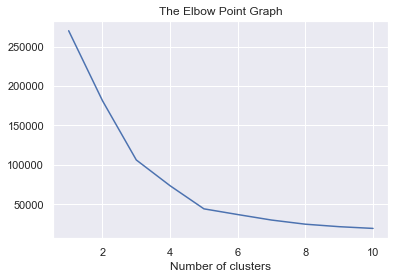

In [8]:
sns.set()
plt.plot(range(1,11),wscc)
plt.title('The Elbow Point Graph')
plt.xlabel("Number of clusters")
plt.show()


We find the best number of clusters by using the elbow method from the plot we that the optimum number of clusters is 5. So we build the model using 5 clusters 

In [9]:
kmeans =KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(X)


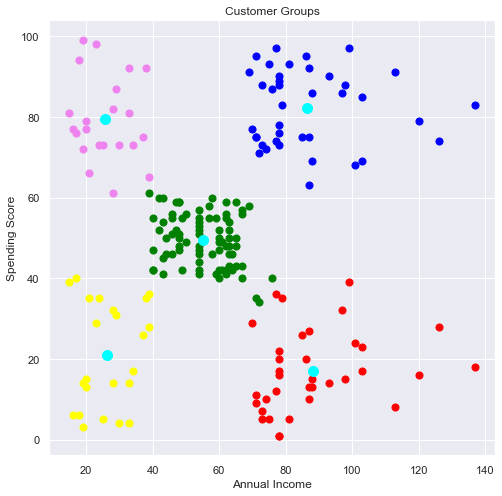

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='red',label='Cluster2 ')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='violet',label='Cluster4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='blue',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()